In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import log_loss

from scipy.stats import randint as sp_randint
from scipy.stats import uniform

from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_final_train = pd.read_csv('final_train_df.csv')
df_final_test = pd.read_csv('final_test_df.csv')

In [3]:
df_final_train.shape

(100002, 51)

In [4]:
df_final_test.shape

(50002, 51)

In [5]:
df_final_train.head()

,source_node,destination_node,indicator_link,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,...,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,273084,1505602,1,11,6,15,8,0,0,0.000000,...,1.983699e-06,-1.545065e-13,-8.108263e-13,-1.719688e-14,-1.355367e-12,4.675285e-13,1.128588e-06,-6.616650e-14,-9.771062e-13,-4.159993e-14
1,1252341,1374700,1,10,1,14,3,0,1,0.926628,...,4.918216e-14,-4.631206e-15,-3.155779e-15,-1.395068e-16,-1.712474e-19,-9.345474e-21,-3.886368e-19,-1.061186e-19,3.102919e-20,-2.556581e-19
2,984700,1048062,1,6,29,11,52,0,0,0.000000,...,4.023688e-12,-4.633236e-14,-2.997645e-11,-4.002844e-16,-1.298131e-12,9.508589e-09,5.260981e-12,-6.742226e-12,-1.709570e-13,-6.255724e-15
3,1788309,1813213,1,26,10,31,0,0,0,0.000000,...,2.390787e-05,-6.561545e-12,-9.588017e-12,-7.499915e-13,-5.863976e-13,8.992600e-14,1.104945e-05,-3.036148e-13,-5.105628e-13,-1.197388e-13
4,979020,485390,1,10,1,14,0,0,0,0.000000,...,2.983898e-12,-1.476051e-12,-1.410034e-09,-2.568708e-14,3.084229e-20,1.845237e-20,1.010081e-19,3.804134e-20,-1.989237e-20,8.285579e-20


In [6]:
df_final_test.head()

,source_node,destination_node,indicator_link,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,...,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,848424,784690,1,6,14,6,9,1,0,0.000000,...,5.904477e-11,-2.701538e-12,-4.341597e-13,-5.535509e-14,-9.994072e-10,5.791899e-10,3.512025e-07,-2.486659e-09,-2.771120e-09,-1.727661e-12
1,111353,1121258,1,7,0,12,1,0,0,0.000000,...,7.590512e-13,-4.724448e-14,-7.165399e-13,-5.845764e-16,1.334453e-19,7.190126e-20,3.727755e-19,8.189645e-20,-7.358946e-20,2.359960e-19
2,1327403,844838,1,2,6,1,9,0,0,0.000000,...,1.269145e-06,-1.447856e-13,-1.285281e-12,-1.074914e-13,-5.376066e-13,1.166558e-13,4.390138e-07,-1.650798e-14,-3.090519e-13,-1.381274e-14
3,380260,917228,1,0,4,0,6,0,0,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.259316e-12,2.872989e-11,1.023766e-10,-2.121218e-12,-8.538985e-10,-1.513135e-12
4,784351,1395044,1,8,2,8,4,0,1,1.430677,...,5.610629e-13,-3.103763e-15,-1.629291e-15,-1.724461e-12,-1.053816e-17,7.350274e-18,4.551412e-15,-1.307975e-18,-2.860774e-18,-6.483176e-20


In [7]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [8]:
df_final_train.drop(['source_node', 'destination_node', 'indicator_link'], axis=1, inplace=True)
df_final_test.drop(['source_node', 'destination_node', 'indicator_link'], axis=1, inplace=True)

# Random Forest Classifier

Estimators =  10 Train Score 0.9785825903116095 test Score 0.8917312433955619
Estimators =  50 Train Score 1.0 test Score 0.8630731807124832
Estimators =  100 Train Score 1.0 test Score 0.8631569376250228
Estimators =  250 Train Score 1.0 test Score 0.859813510247817
Estimators =  450 Train Score 1.0 test Score 0.8607485364131301


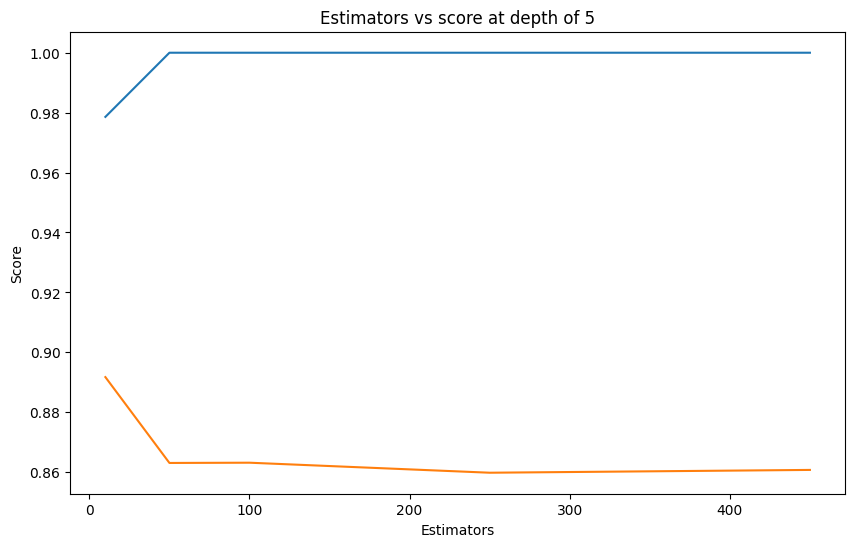

CPU times: user 4min 18s, sys: 844 ms, total: 4min 19s
Wall time: 2min 30s


In [9]:
%%time

estimators = [10, 50, 100, 250, 450]
train_scores = []
test_scores = []

for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)

plt.figure(figsize=(10,6))
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')
plt.show()

depth =  3 Train Score 0.9754866766497774 test Score 0.8843229824678059
depth =  9 Train Score 1.0 test Score 0.8598591067642433
depth =  11 Train Score 1.0 test Score 0.8610858079795956
depth =  15 Train Score 1.0 test Score 0.847403719836825
depth =  20 Train Score 1.0 test Score 0.835196571641513
depth =  35 Train Score 1.0 test Score 0.835386442493538
depth =  50 Train Score 1.0 test Score 0.835386442493538
depth =  70 Train Score 1.0 test Score 0.835386442493538
depth =  130 Train Score 1.0 test Score 0.835386442493538


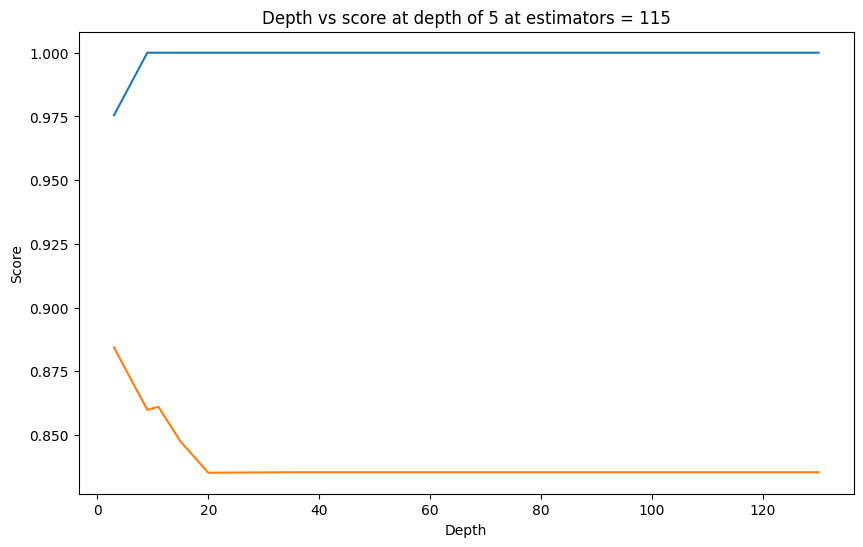

CPU times: user 6min 47s, sys: 1.19 s, total: 6min 48s
Wall time: 3min 57s


In [10]:
%%time

depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []

for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)

plt.figure(figsize=(10,6))
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [11]:
%%time

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)

CPU times: user 33min 43s, sys: 5.23 s, total: 33min 48s
Wall time: 19min 34s


RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78baa7cfd650>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78baaa51bd50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78baa7cfd290>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78baa7df1310>},
                   random_state=25, scoring='f1')

In [12]:
print('mean test scores',rf_random.cv_results_['mean_test_score'])

mean test scores [1. 1. 1. 1. 1.]


In [13]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=14, min_samples_leaf=51, min_samples_split=125,
                       n_estimators=117, n_jobs=-1, random_state=25)


In [14]:
%%time
rf_model = RandomForestClassifier(max_depth=14, min_samples_leaf=51, min_samples_split=125,
                       n_estimators=117, n_jobs=-1, random_state=25)
rf_model.fit(df_final_train,y_train)

CPU times: user 45.1 s, sys: 97.3 ms, total: 45.2 s
Wall time: 31.7 s


RandomForestClassifier(max_depth=14, min_samples_leaf=51, min_samples_split=125,
                       n_estimators=117, n_jobs=-1, random_state=25)

In [15]:
y_train_pred = rf_model.predict(df_final_train)
y_test_pred = rf_model.predict(df_final_test)

In [16]:
print('Train F1 Score',f1_score(y_train,y_train_pred))
print('Test F1 Score',f1_score(y_test,y_test_pred))

Train F1 Score 1.0
Test F1 Score 0.8467728918301934


In [17]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)

    A =(((C.T)/(C.sum(axis=1))).T)

    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))

    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")

    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")

    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")

    plt.show()

Train confusion_matrix


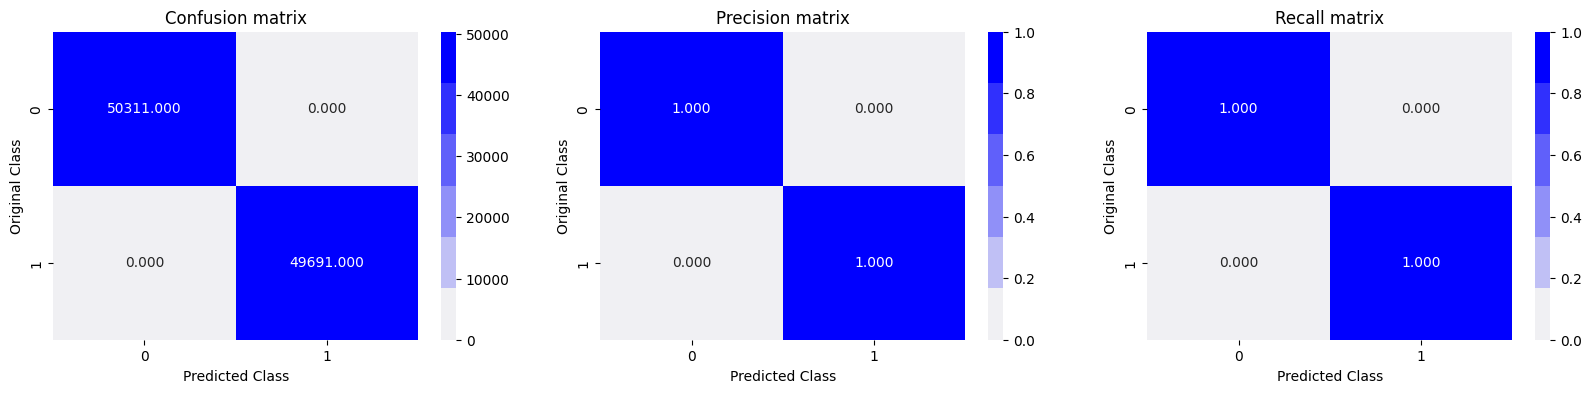

Test confusion_matrix


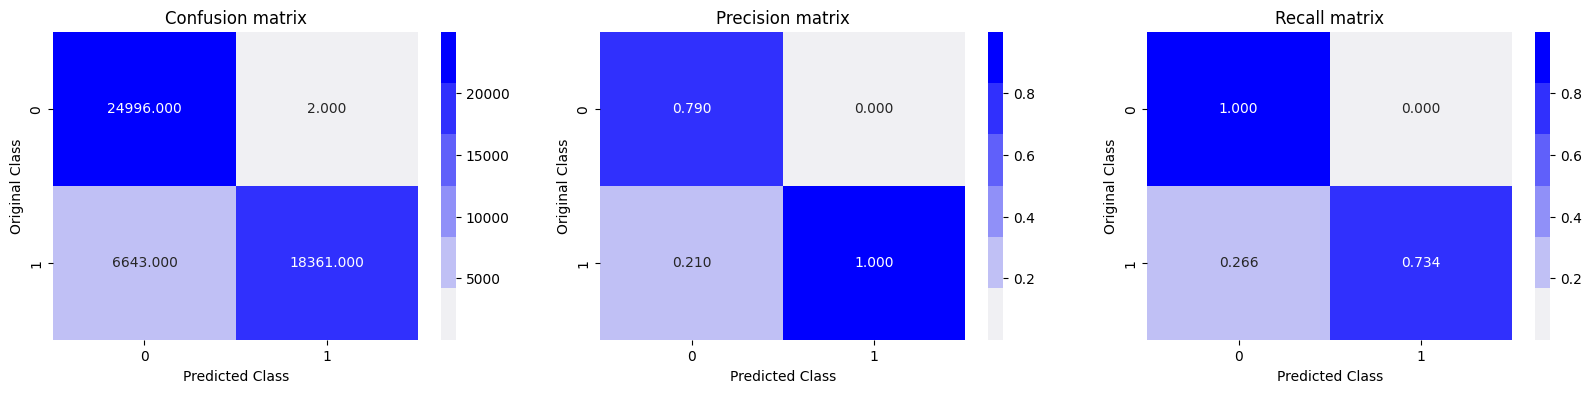

In [18]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

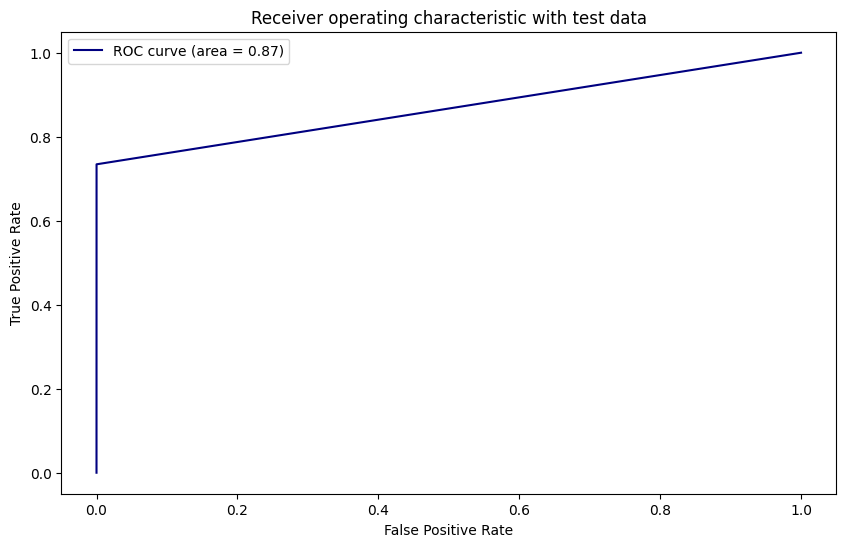

In [19]:
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

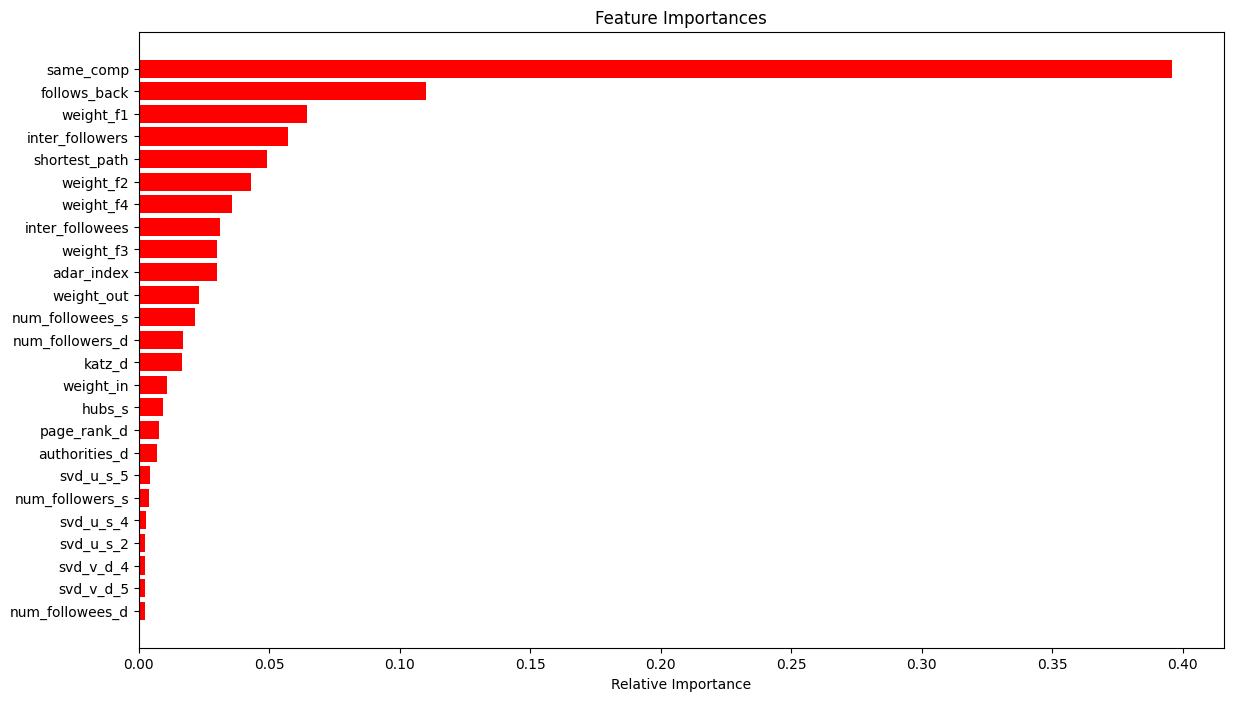

In [20]:
features = df_final_train.columns
importances = rf_model.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(14, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# XgBoost

In [21]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    labels = [0,1]
    cmap=sns.light_palette("green")
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(5,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(5,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))

    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(5,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

In [29]:
%%time

params = {
        'min_child_weight': [1, 5, 10],
        'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
        'n_estimators' :[100,200,500,1000,2000],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
          }
xgboost = XGBClassifier()
random_cfl1=RandomizedSearchCV(xgboost,param_distributions = params,verbose=10,n_jobs=-1)
random_cfl1.fit(df_final_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: user 37.5 s, sys: 719 ms, total: 38.2 s
Wall time: 5min 32s


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.15, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         2000],
                                        'subsample': [0.6, 0.8, 1.0]},
                   verbose=10)

In [30]:
print(random_cfl1.best_params_)

{'subsample': 0.6, 'n_estimators': 2000, 'min_child_weight': 10, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.8}


In [31]:
%%time

best_xgb = XGBClassifier(sub_sample=0.8,learning_rate = 0.2,colsample_bytree=0.6,max_depth=5,n_estimators=1000,min_child_weight=5,gamma=5)
best_xgb.fit(df_final_train,y_train)
clf = CalibratedClassifierCV(best_xgb,method="sigmoid")
clf.fit(df_final_train,y_train)

CPU times: user 1min 24s, sys: 252 ms, total: 1min 24s
Wall time: 47.2 s


CalibratedClassifierCV(estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=0.6,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=5,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=0.2, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None, max_depth=5,
                                               max_leaves=None,
                                               min_child_weight=5, missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=1000, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=None, ...))

the train log loss is 0.00010003572539522079
the test log loss is 2.0443039101944946
Number of misclassified points  22.39710411583537
-------------------------------------------------- Confusion matrix --------------------------------------------------


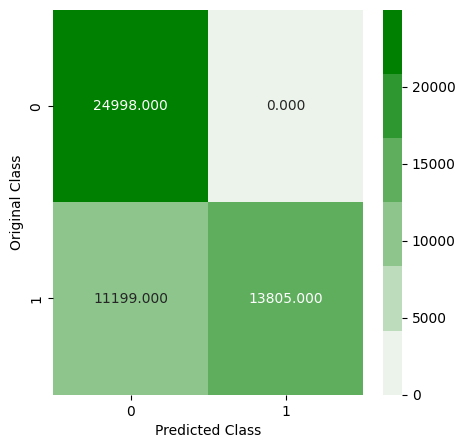

-------------------------------------------------- Precision matrix --------------------------------------------------


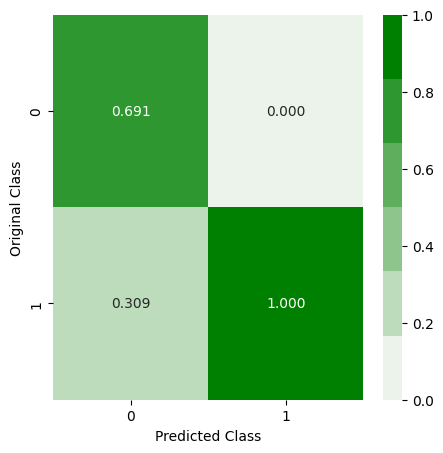

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


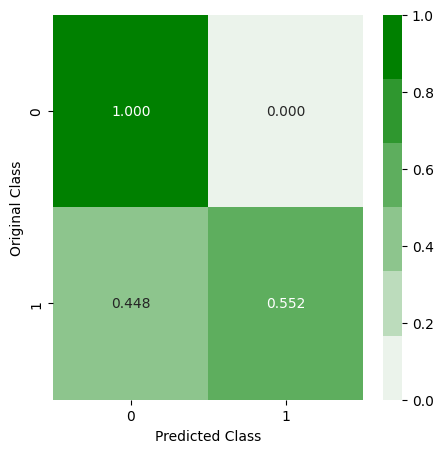

Sum of rows in precision matrix [1. 1.]
CPU times: user 6.24 s, sys: 318 ms, total: 6.55 s
Wall time: 4.73 s


In [32]:
%%time

predict_y = clf.predict_proba(df_final_train)
print("the train log loss is",log_loss(y_train,predict_y,labels=best_xgb.classes_))
predict_y = clf.predict_proba(df_final_test)
print("the test log loss is",log_loss(y_test,predict_y,labels = best_xgb.classes_))
plot_confusion_matrix(y_test,clf.predict(df_final_test))

In [33]:
print("f1 score for train data",f1_score(y_train,clf.predict(df_final_train)))
print("f1 score for test data",f1_score(y_test,clf.predict(df_final_test)))

f1 score for train data 1.0
f1 score for test data 0.7114329150454791


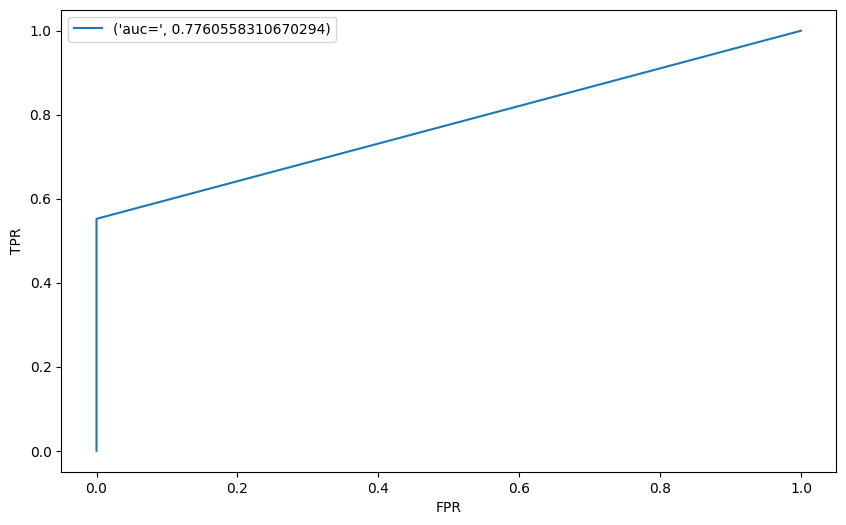

In [34]:
fpr,tpr,ths = roc_curve(y_test,clf.predict(df_final_test))
auc_sc = auc(fpr, tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr,label = ('auc=',auc_sc))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

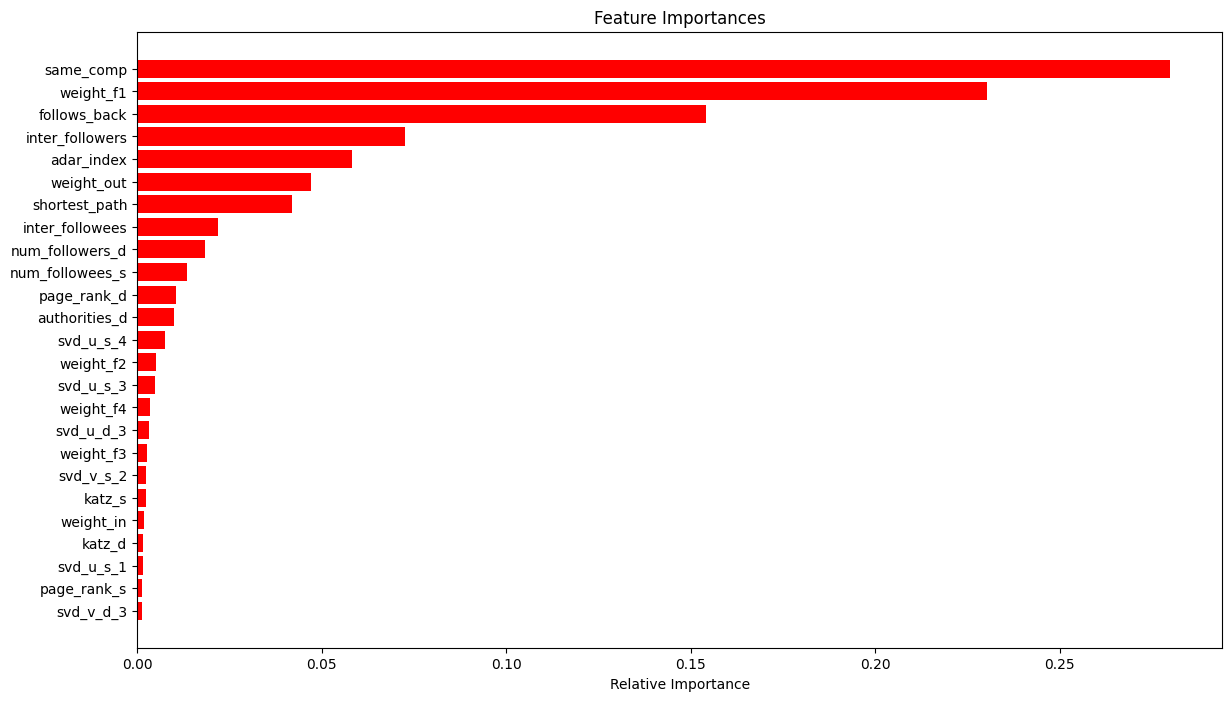

In [35]:
features = df_final_train.columns
importances = best_xgb.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(14, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [36]:
from prettytable import PrettyTable
t = PrettyTable()
t.field_names=["model","train_f1_Score","test_f1_score"]
t.add_row(["RandomForest","1.0","0.8467728918301934"])
t.add_row(["XGBoost","1.0","0.7114329150454791"])
print(t)

+--------------+----------------+--------------------+
|    model     | train_f1_Score |   test_f1_score    |
+--------------+----------------+--------------------+
| RandomForest |      1.0       | 0.8467728918301934 |
|   XGBoost    |      1.0       | 0.7114329150454791 |
+--------------+----------------+--------------------+
